In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 線形回帰をTensorflowで実行してみる

### 計算グラフの定義

In [2]:
X = tf.placeholder(tf.float32, shape=(None, 2))
Y = tf.placeholder(tf.float32, shape=(None, 1))

In [3]:
B = tf.Variable(np.zeros((2,1), dtype='float32'), 'B')
# B = tf.Variable(np.array([[1],[2]], dtype='float32'), 'B')

In [5]:
PRED = tf.matmul(X, B)
COST = tf.reduce_sum((Y - PRED) ** 2)

### データの準備

In [7]:
num_data = 100
param_b = np.array([3,5]).reshape((2,1))
data_x = np.random.randn(num_data * 2).reshape((-1,2))
data_y = np.dot(data_x, param_b) + np.random.randn(num_data).reshape((-1,1))

試しに実行↓

In [9]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(COST, {X: data_x, Y: data_y}))

3428.481


### ミニバッチを返すイテレータ

In [21]:
def next_batch(x, y, bsize=10):
    num_data = x.shape[0]
    index = np.random.permutation(np.arange(num_data))
    pos = 0
    while pos < num_data:
        ind = index[pos:pos+bsize]
        yield x[ind], y[ind]
        pos += bsize

### 等高線を描く

In [10]:
def cost_funtion(b1, b2, x, y):
    b = np.vstack(([b1], [b2]))
    pred = np.tensordot(b, x, (0,1))
    diff = pred - y.reshape(-1)
    ret = np.sum(diff**2, axis=2)
    return ret

In [16]:
def plot_contour(b1_range, b2_range, x, y, axis):
    b1 = np.linspace(b1_range[0], b1_range[1], 40)
    b2 = np.linspace(b2_range[0], b2_range[1], 40)
    b1, b2 = np.meshgrid(b1, b2)
    z = cost_funtion(b1, b2, x, y)    
    axis.contour(b1, b2, z)

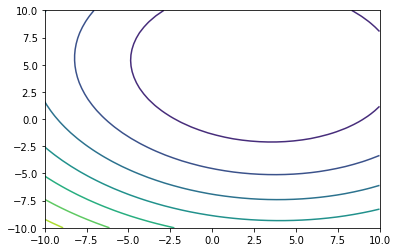

In [17]:
fig, ax = plt.subplots()
plot_contour((-10, 10), (-10, 10), data_x, data_y, ax)

### 最適化を実行する関数

In [30]:
def run_optimize(optimizer, num_epoch = 20):
    param_hist = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for _ in range(num_epoch):
            for bx, by in next_batch(data_x, data_y):
                sess.run(optimizer, {X: bx, Y: by})
                temp_b = sess.run(B)
                param_hist.append(temp_b)
    return np.array(param_hist)[:,:,0]

### Gradient Descentで最適化

In [31]:
gd_step = tf.train.GradientDescentOptimizer(0.001).minimize(COST)
b_gd = run_optimize(gd_step)

### パラメータの軌跡を表示

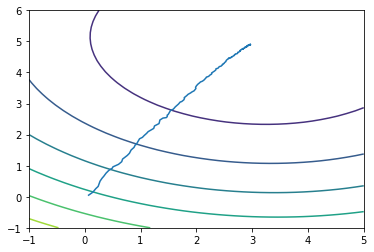

In [32]:
fig, ax = plt.subplots()
plot_contour((-1, 5), (-1, 6), data_x, data_y, ax)
ax.plot(b_gd[:,0], b_gd[:,1])